In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

cust_pd = pd.read_csv("auto_mpg.csv", delim_whitespace=True)
cust_pd.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


<Axes: xlabel='mpg', ylabel='displacement'>

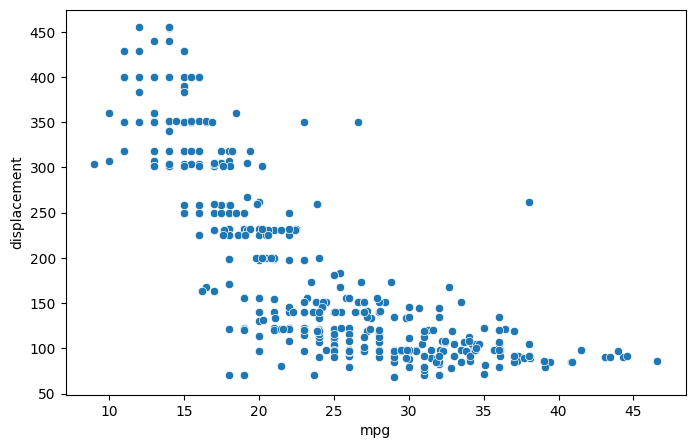

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.scatterplot(x=cust_pd["mpg"], y=cust_pd["displacement"])

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cust_pd = pd.DataFrame(cust_pd, columns=["mpg", "displacement"])
cust_pd.head()

,mpg,displacement
0,18.0,307.0
1,15.0,350.0
2,18.0,318.0
3,16.0,304.0
4,17.0,302.0


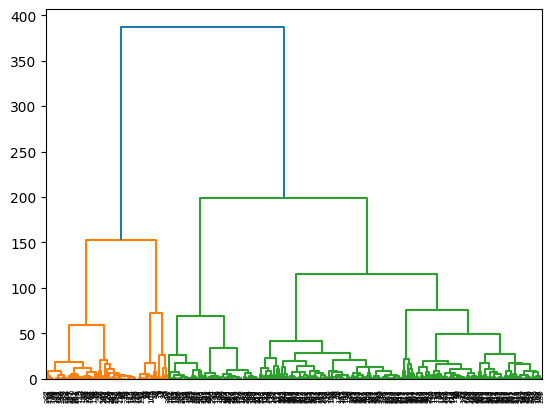

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(cust_pd, method='complete', metric='euclidean')
dendrogram(linked, orientation='top', distance_sort='ascending',show_leaf_counts=False)
plt.show()

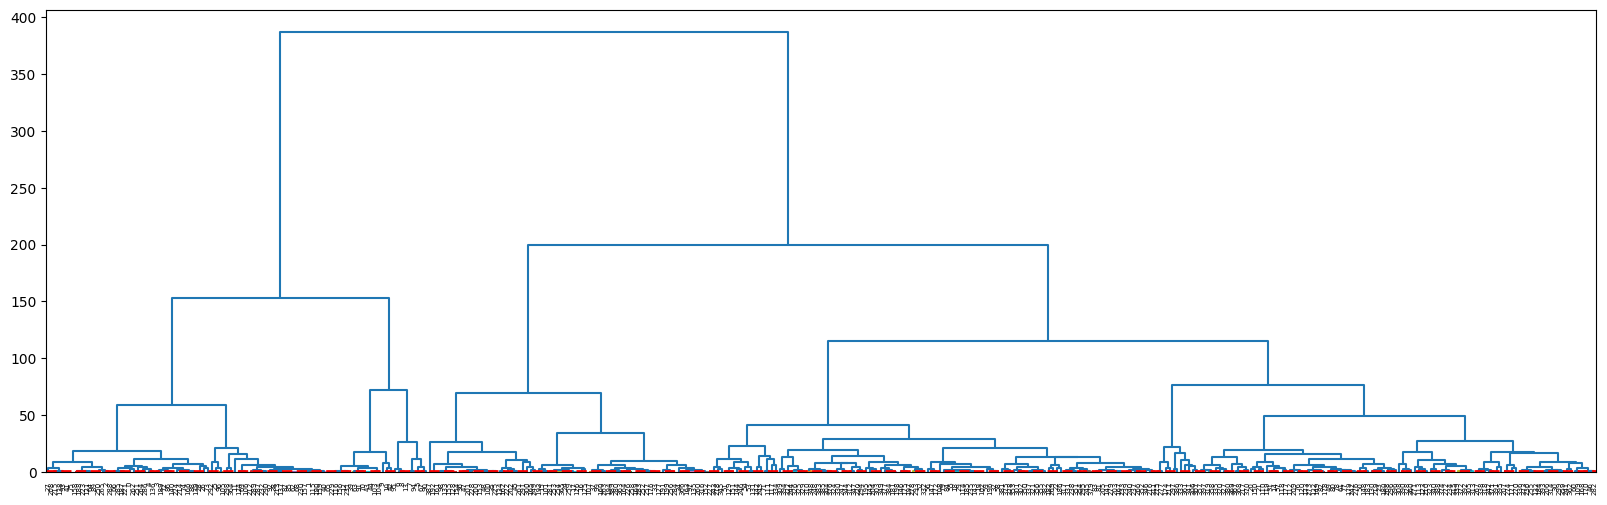

In [5]:
# Specify the cut threshold so that data will be partitioned into the desired clusters
plt.figure(figsize=(20,6))
dendrogram(linked, orientation='top', distance_sort='ascending',show_leaf_counts=False, color_threshold=0.5)
plt.axhline(y=0.5, c='r', linestyle='--', linewidth=2)
# we can draw a horizontal line to cut the dendrogram
plt.show()

In [6]:
# To do a k-means clustering, import K-means from Scikit-Learn
from sklearn.cluster import KMeans
# Set the number of clusters, K = 4. Assuming there are 4 clusters.
# Initialize the centroids
init_centroids = np.array([[0.01,0.02],[0.01,0.015],[0.01,0.022],[0.01,0.023]])
# Define K-means
kmeans = KMeans(n_clusters=4, init=init_centroids, n_init=1)
kmeans.fit(cust_pd)


KMeans(init=array([[0.01 , 0.02 ],
       [0.01 , 0.015],
       [0.01 , 0.022],
       [0.01 , 0.023]]),
       n_clusters=4, n_init=1)

In [7]:
# Generate the centroid values for the final clusters
centroids = kmeans.cluster_centers_
print(centroids)

[[ 15.05068493 327.19178082]
 [ 19.74050633 228.88607595]
 [ 13.7        413.68      ]
 [ 28.76968326 111.64932127]]


Text(28.69968325791855, 111.57932126696835, 'Cluster 4')

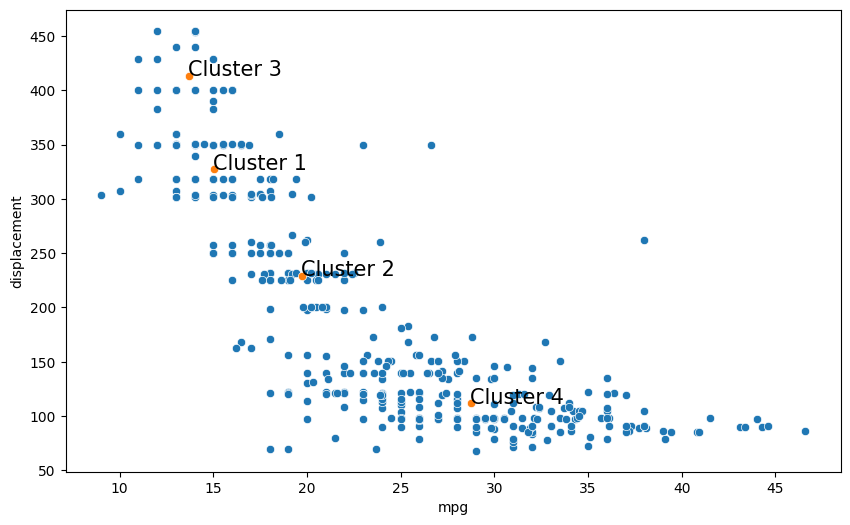

In [8]:
# Display the clusters using the scatter plot
offset = 0.07
fig, ax = plt.subplots(figsize = (10,6))
sns.scatterplot(x=cust_pd["mpg"], y=cust_pd["displacement"])
sns.scatterplot(x=centroids[:,0], y=centroids[:,1])
ax.annotate('Cluster 1', xy=(centroids[0,0]-offset,centroids[0,1]-offset),size=15)
ax.annotate('Cluster 2', xy=(centroids[1,0]-offset,centroids[1,1]-offset),size=15)
ax.annotate('Cluster 3', xy=(centroids[2,0]-offset,centroids[2,1]-offset),size=15)
ax.annotate('Cluster 4', xy=(centroids[3,0]-offset,centroids[3,1]-offset),size=15)

Text(28.69968325791855, 111.57932126696835, 'Cluster 4')

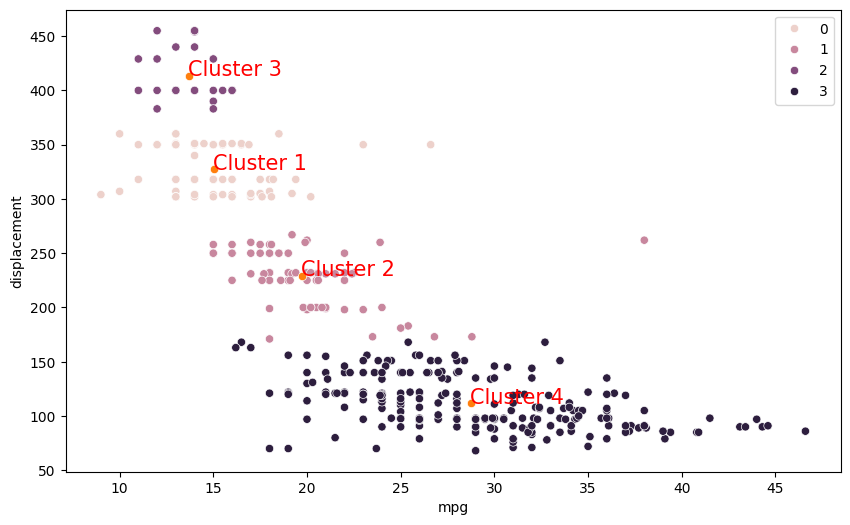

In [9]:
offset = 0.07
pred = kmeans.predict(cust_pd)
fig, ax = plt.subplots(figsize = (10,6))
sns.scatterplot(x=cust_pd["mpg"], y=cust_pd["displacement"], hue=pred)
sns.scatterplot(x=centroids[:,0], y=centroids[:,1])
ax.annotate('Cluster 1', xy=(centroids[0,0]-offset,centroids[0,1]-offset),size=15, color = 'red')
ax.annotate('Cluster 2', xy=(centroids[1,0]-offset,centroids[1,1]-offset),size=15, color = 'red')
ax.annotate('Cluster 3', xy=(centroids[2,0]-offset,centroids[2,1]-offset),size=15, color = 'red')
ax.annotate('Cluster 4', xy=(centroids[3,0]-offset,centroids[3,1]-offset),size=15, color = 'red')

In [10]:
# Generate centroid values for final clusters
centroids = kmeans.cluster_centers_
print(centroids)

[[ 15.05068493 327.19178082]
 [ 19.74050633 228.88607595]
 [ 13.7        413.68      ]
 [ 28.76968326 111.64932127]]


Text(28.69968325791855, 111.57932126696835, 'Cluster 4')

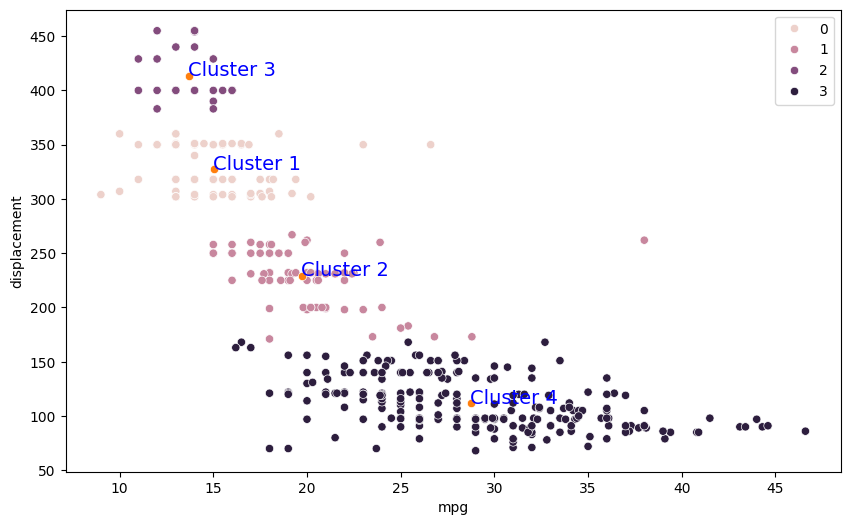

In [11]:
offset = 0.07
pred = kmeans.predict(cust_pd)
fig, ax = plt.subplots(figsize = (10,6))
sns.scatterplot(x=cust_pd["mpg"], y=cust_pd["displacement"], hue=pred)
sns.scatterplot(x=centroids[:,0], y=centroids[:,1])
ax.annotate('Cluster 1', xy=(centroids[0,0]-offset,centroids[0,1]-offset),color='blue', size=14)
ax.annotate('Cluster 2', xy=(centroids[1,0]-offset,centroids[1,1]-offset),color='blue', size=14)
ax.annotate('Cluster 3', xy=(centroids[2,0]-offset,centroids[2,1]-offset),color='blue', size=14)
ax.annotate('Cluster 4', xy=(centroids[3,0]-offset,centroids[3,1]-offset),color='blue', size=14)

In [12]:
# Perform the customer dataset using Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean',linkage='ward') # by default ward linkage & euclidean metric
pred = model.fit_predict(cust_pd)

e:\working\studytool\coding_program\python\venv\001\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Text(0, 0.5, 'displacement')

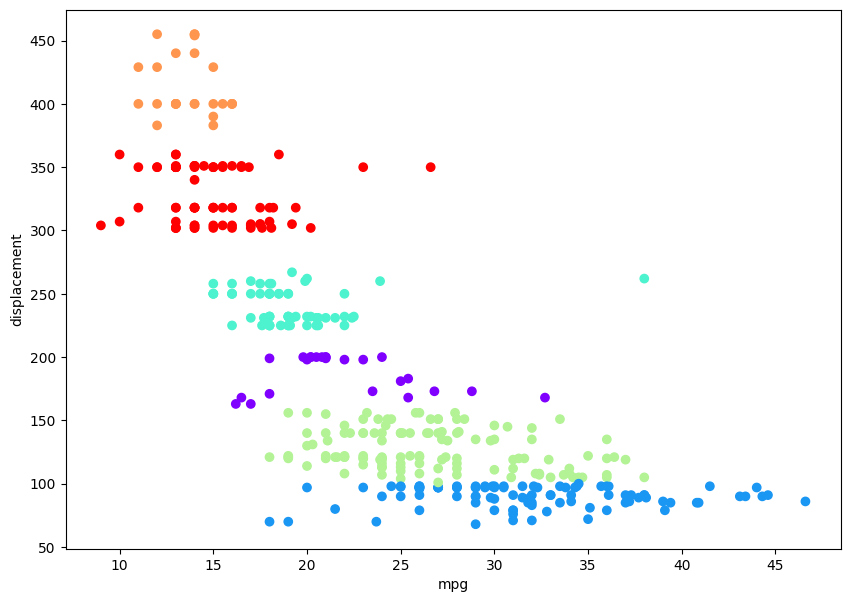

In [13]:
# Let's plot the clusters to see how actually our data has been clustered
plt.figure(figsize=(10, 7))
plt.scatter(x=cust_pd["mpg"], y=cust_pd["displacement"], c=pred, cmap='rainbow_r')
plt.xlabel('mpg')
plt.ylabel('displacement')
